In [208]:
#ECE-475-HW!
#Zheng Liu
#An analysis of Citibike service
#Based on the data of all the rides in July 2018
#Downloaded from Citibike official website

In [108]:
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import geopy as gp
from geopy import distance 
#!{sys.executable} -m pip install folium
import folium

In [4]:
#Read Data
citi = pd.read_csv('/Users/Alex/Documents/ML/201807-citibike-tripdata.csv')
print("Total number of use is {}.".format(citi.shape[0]))
citi.head()

Total number of use is 1913625.


,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,500,2018-07-01 00:33:51.2640,2018-07-01 00:42:12.0280,72,W 52 St & 11 Ave,40.767272,-73.993929,3236,W 42 St & Dyer Ave,40.758985,-73.993800,16583,Subscriber,1981,1
1,455,2018-07-01 02:06:54.0270,2018-07-01 02:14:29.0900,72,W 52 St & 11 Ave,40.767272,-73.993929,529,W 42 St & 8 Ave,40.757570,-73.990985,31481,Subscriber,1988,1
2,1080,2018-07-01 02:09:16.4640,2018-07-01 02:27:17.0290,72,W 52 St & 11 Ave,40.767272,-73.993929,453,W 22 St & 8 Ave,40.744751,-73.999154,25004,Subscriber,1982,2
3,632,2018-07-01 02:55:04.5870,2018-07-01 03:05:36.7910,72,W 52 St & 11 Ave,40.767272,-73.993929,465,Broadway & W 41 St,40.755136,-73.986580,25867,Subscriber,1986,1
4,1676,2018-07-01 03:24:27.4350,2018-07-01 03:52:23.7760,72,W 52 St & 11 Ave,40.767272,-73.993929,3425,2 Ave & E 104 St,40.789210,-73.943708,31351,Subscriber,1992,1


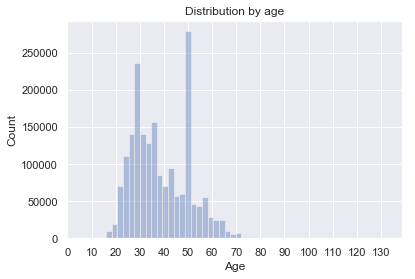

In [197]:
#Age Distribution
sns.set(color_codes=True)
sns.distplot(2018-citi['birth year'], kde = False, rug = False);
plt.xticks(np.arange(0, 140, 10))
plt.ylabel("Count")
plt.xlabel("Age")
plt.title('Distribution by age')
plt.show()

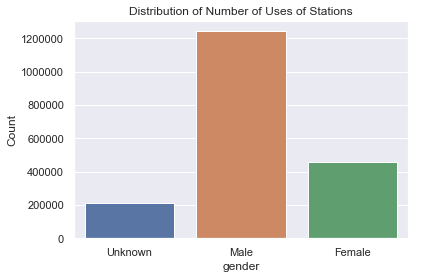

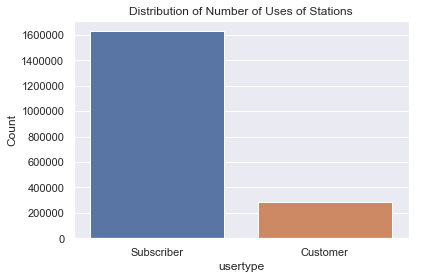

In [195]:
#Gender
#sns.distplot(citi['gender'], kde = False, rug = False);
sns.countplot(x="gender", data=citi)
plt.xticks(np.arange(3), ('Unknown', 'Male', 'Female'))
plt.ylabel("Count")
plt.title('Distribution by Gender')
plt.show()
sns.countplot(x="usertype", data=citi)
plt.ylabel("Count")
plt.title('Distribution by User Type')
plt.show()

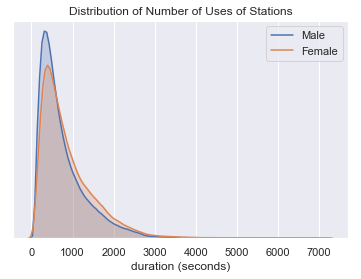

In [193]:
#Gener vs duration
sns.kdeplot(citi[(citi['gender']==1) & (citi['tripduration']<7200)]['tripduration'], shade=True)
sns.kdeplot(citi[(citi['gender']==2) & (citi['tripduration']<7200)]['tripduration'], shade=True)
plt.title('Distribution of Number of Uses of Stations')
plt.xlabel('duration (seconds)')
plt.yticks([])
plt.legend(['Male', 'Female'])
#sns.relplot(x="gender", y="tripduration", data = citi[citi.tripduration<7200]);
plt.show()

In [198]:
#geo stuff

#If start_station == end_station, exclude
citi['trip'] = citi[citi['start station id']!=citi['end station id']][['start station id','end station id']].apply(tuple,axis=1)

count = citi['trip'].value_counts()
citi['trip'].drop_duplicates();
print("Below is the list of trips (combination of stations basically)\n\n")
print(count)
print('\n\n\n\n\n\n')

popular = count.idxmax()
stationsjson = pd.read_json('/Users/Alex/Documents/ML/stations.json');
stations = pd.io.json.json_normalize(stationsjson['stationBeanList']);
sstation=stations[stations.id == popular[0]]['stAddress1']
estation=stations[stations.id == popular[1]]['stAddress1']


print("\nStart station of the most popular trip is " + str(sstation).split('\n')[0])
print("\nEnd station of the most popular trip is " + str(estation).split('\n')[0])
loc1=stations[stations.id == popular[0]][['latitude','longitude']].apply(tuple,axis=1)
loc2=stations[stations.id == popular[1]][['latitude','longitude']].apply(tuple,axis=1)
dis = distance.distance(loc1,loc2).miles
print("\n\n\nThe distance between them is {:.2f} mile".format(dis))


Below is the list of trips (combination of stations basically)


(3254, 3479)    861
(3479, 3254)    859
(2006, 3282)    714
(3254, 3182)    709
(3182, 3254)    705
(514, 426)      649
(281, 2006)     631
(432, 3263)     595
(460, 3093)     567
(514, 3256)     560
(3093, 460)     556
(3256, 426)     529
(281, 3282)     525
(3479, 3182)    520
(3182, 3479)    515
(2006, 3137)    513
(426, 514)      487
(435, 509)      471
(519, 492)      432
(519, 498)      431
(459, 426)      427
(3002, 427)     426
(2008, 3002)    426
(2006, 3374)    425
(3002, 2008)    419
(3256, 2008)    417
(426, 2008)     410
(387, 232)      410
(3351, 3318)    404
(321, 387)      402
               ... 
(540, 3107)       1
(3676, 399)       1
(3535, 3161)      1
(3496, 472)       1
(238, 461)        1
(3284, 3318)      1
(3333, 3413)      1
(3322, 3082)      1
(341, 308)        1
(401, 3382)       1
(3502, 3143)      1
(3002, 3648)      1
(2008, 406)       1
(3469, 3121)      1
(3135, 3514)      1
(528, 2008)    

In [173]:

print("\n\n\nI don't know where they are. So I included a map to show them.")
loc_1 = loc1.reset_index().rename(columns={0:'A'})
loc_2 = loc1.reset_index().rename(columns={0:'A'})

m = folium.Map(location=[40.75, -74], tiles="Mapbox Bright", zoom_start=11)
folium.Marker(loc_1.at[0,'A'], "Start").add_to(m)
folium.Marker(loc_2.at[0,'A'], "End").add_to(m)
m 




I don't know where they are. So I included a map to show them.


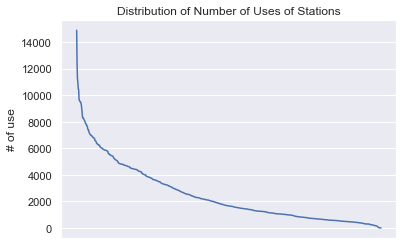


Below is the list of stations with their id on the left and # of use on the right



519     14888
426     12370
514     11249
497     10974
281     10476
435     10435
499      9708
402      9576
3002     9545
2006     9495
459      9490
285      9372
368      9215
358      8914
477      8658
490      8289
505      8283
387      8266
3256     8180
3255     8132
457      8082
293      7985
327      7905
492      7839
151      7785
382      7773
3660     7664
229      7639
168      7439
3641     7382
        ...  
3587      279
3453      253
3492      252
3337      252
3647      250
3044      248
3631      242
3692      226
3661      226
3590      209
3586      205
3669      203
3564      192
3557      183
3559      169
3596      161
2005      159
3512      152
3567      151
3620      129
3333      121
3468       75
3434       40
3240       20
3683       17
3432       17
3485       13
3036        2
3650        1
439         1
Name: start station id, Length: 768, dtype: int64

In [181]:
#geo continued
count2 = citi['start station id'].value_counts()
count2.reset_index().plot(y = 1, legend=None)
plt.title('Distribution of Number of Uses of Stations')
plt.ylabel('# of use')
plt.xticks([])
plt.show()

print("\nBelow is the list of stations with their id on the left and # of use on the right\n")
count2


In [202]:
id1 = count2.idxmax()
id2 = count2[count2>1].idxmin()

most_popular = stations[stations.id == id1]['stAddress1']
least_popular = citi[citi['start station id']==id2].reset_index().loc[0].at['start station name']

print("\nMost popular station is " + str(most_popular).split('\n')[0])
print("\nLeast popular station is " + str(least_popular).split('\n')[0])

m = folium.Map(location=[40.75, -74], tiles="Mapbox Bright", zoom_start=11)
folium.Marker((citi[citi['start station id']==id1].reset_index().loc[0].at['start station latitude'], citi[citi['start station id']==id1].reset_index().loc[0].at['start station longitude']), "Most Popular").add_to(m)
folium.Marker((citi[citi['start station id']==id2].reset_index().loc[0].at['start station latitude'], citi[citi['start station id']==id2].reset_index().loc[0].at['start station longitude']), "Least Popular").add_to(m)
m 




Most popular station is 252    Pershing Square North

Least popular station is 8D OPS 01


In [204]:
#Efficiency of docks
print("\nCompare the most popular stations and the ones with the most docks, emmmmm\n")
dockN = stations.sort_values(by='totalDocks',ascending = False)['totalDocks'].reset_index()[0:10]
compare = count2.reset_index()[0:10].join(dockN, lsuffix='usage#', rsuffix='dock#')
compare.rename(columns={"indexusage#": "station id", "start station id": "usage#", "indexdock#":"station id", "totalDocks":"dock#"})



Compare the most popular stations and the ones with the most docks, emmmmm



,station id,usage#,station id,dock#
0,519,14888,393,67
1,426,12370,404,63
2,514,11249,11,62
3,497,10974,252,61
4,281,10476,229,61
5,435,10435,234,59
6,499,9708,250,59
7,402,9576,228,59
8,3002,9545,803,59
9,2006,9495,217,59


In [205]:
#Some jokes
print("The oldest rider is",2018-citi['birth year'].min(),"born in", citi['birth year'].min())

print("The longest ride is", citi['tripduration'].max(), "seconds,", citi['tripduration'].max()/3600, "hours,", citi['tripduration'].max()/3600/24, "days (in a month )" )


The oldest rider is 133 born in 1885
The longest ride is 4829587 seconds, 1341.5519444444444 hours, 55.89799768518518 days (in a month )
